# 4.10 Part 2

Context:
1. Import libriaries and Data 
2. Bar Chart Price range count
3. Count Orders by department
4. Bar chart Customer count by region 
5. Bar chart Age group and Family status
6. Bar chart Customer profile by loyalty status 
7. Price range by loyalty status
8. Bar chart Loyalty status by departments

## 1 Import libraries and dataset

In [1]:
# Import libriaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set
final_data = pd.read_pickle(r'C:\Users\irikh\iCloudDrive\Data analytics\Instacart basket Analysis\02 Data\Prepared Data\final_data.pkl')

In [3]:
final_data.shape

(24414877, 37)

In [4]:
final_data.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_frequency', 'frequency_flag',
       'Gender', 'US state', 'Age', 'date_joined', 'number_of_dependants',
       'marital_status', 'income', '_merge', 'region', 'customer_activity',
       'age_group', 'income_group', 'department', 'customer_profile'],
      dtype='object')

## 2 Price range count

Text(0.5, 1.0, 'Price range count')

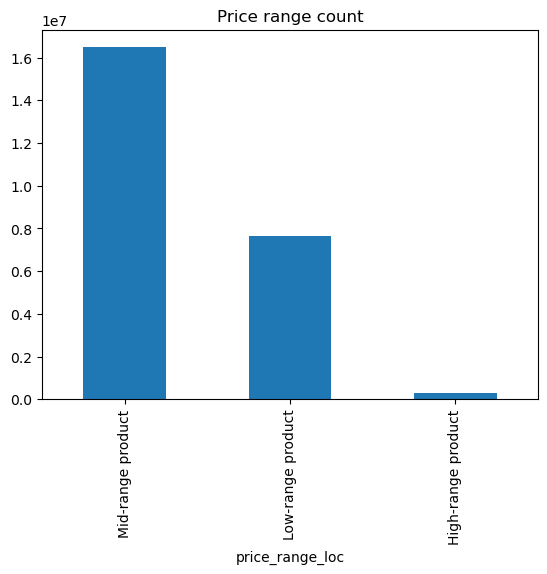

In [5]:
# Creating bar chart for 'price range count' 
bar_price_range = final_data['price_range_loc'].value_counts().plot.bar()
plt.title('Price range count')

In [6]:
# To print result (from largest to smallest)
final_data ['price_range_loc'].value_counts()

price_range_loc
Mid-range product     16479445
Low-range product      7626745
High-range product      308687
Name: count, dtype: int64

In [7]:
# Path 
path = r"C:\Users\irikh\iCloudDrive\Data analytics\Instacart basket Analysis"

In [8]:
# Exporting bar chart.
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range.png'))

## 3 Count Orders by department 

In [9]:
# Count of orders by department (from largest to smallest)
final_data['department'].value_counts()

department
produce            7227091
dairy eggs         4120488
snacks             2187121
beverages          2036447
frozen             1627614
pantry             1385375
bakery              883330
canned goods        787790
deli                783011
dry goods pasta     633725
household           539349
breakfast           524945
meat seafood        523890
babies              335947
personal care       328480
international       197900
alcohol             107972
pets                 72111
missing              57567
bulk                 27558
other                27166
Name: count, dtype: int64

## 4 Bar chart Customer count by region 

Text(0.5, 1.0, 'Customer count by region')

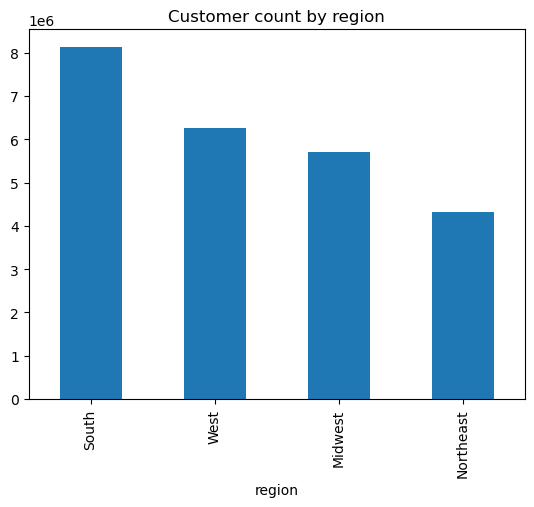

In [10]:
# Creating bar chart for 'customer count by region' 
bar_customer_by_regiion = final_data['region'].value_counts().plot.bar()
plt.title('Customer count by region')

In [11]:
# Exporting bar chart.
bar_customer_by_regiion.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pcustomer_by_region.png'))

## 5 Bar chart Age group and Family status 

In [12]:
# Pivot the data to create a stacked bar chart to see relationship between 'age_group' and 'family_status'
age_grp_fam_stat = final_data.groupby(['age_group', 'marital_status']).size().unstack(1)

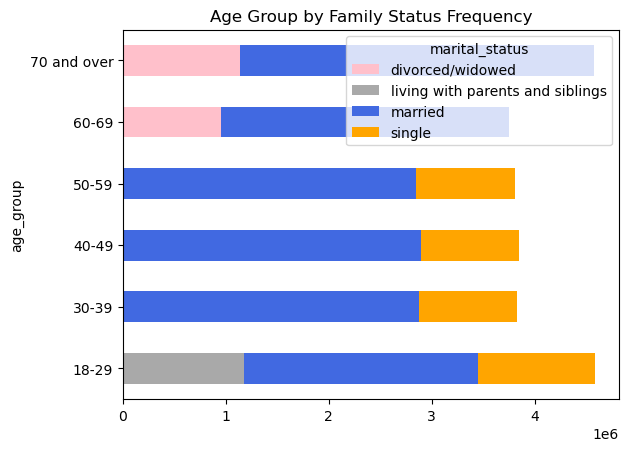

In [13]:
# Create bar chart
bar_age_grp_fam_stat = age_grp_fam_stat.plot.barh(stacked = True, color = ['pink', 'darkgray', 'royalblue', 'orange'], title = 'Age Group by Family Status Frequency')

In [14]:
# Exporting bar chart.
bar_age_grp_fam_stat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_gp_by_marital_status.png'))

## 6 Customer profile by loyalty status 

Text(0.5, 1.0, 'Customer Profile Distribution by Loylty Status')

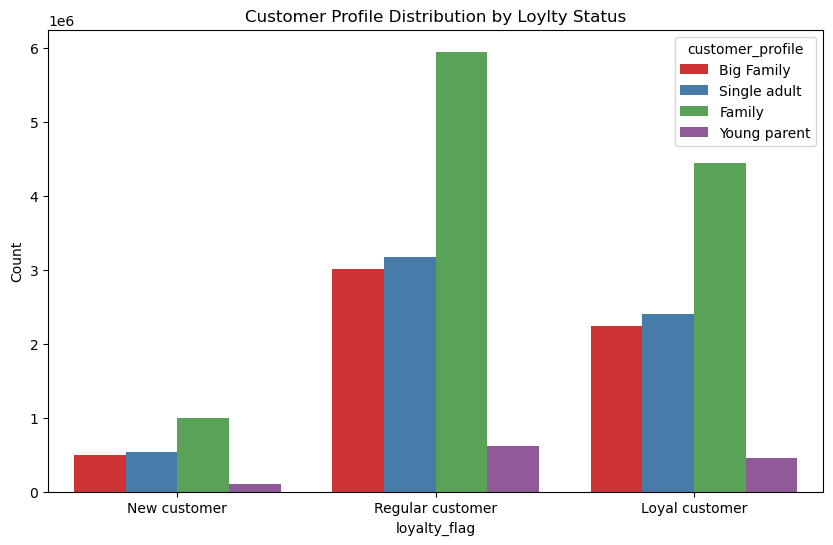

In [15]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'Loyalty Status'
plt.figure(figsize=(10, 6))
countplot_customer_by_loyalty = sns.countplot(x='loyalty_flag', hue='customer_profile', palette='Set1', data=final_data)
plt.xlabel('loyalty_flag')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Loylty Status')

In [16]:
# Exporting Countplot bar chart
countplot_customer_by_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_customer_by_loyalty.png'))

## 7 Price range by loyalty status 

Text(0.5, 1.0, 'Price Range Distribution by Loylty Status')

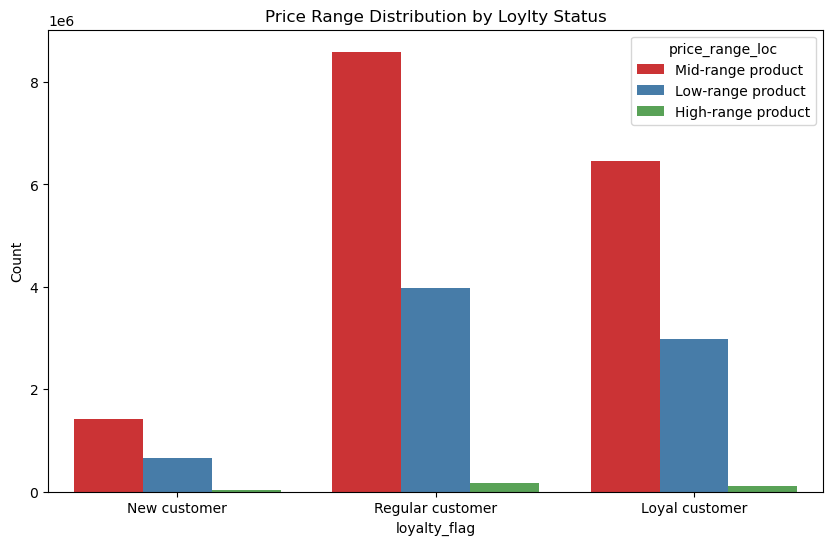

In [17]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'Loyalty Status'
plt.figure(figsize=(10, 6))
countplot_price_by_loyalty = sns.countplot(x='loyalty_flag', hue='price_range_loc', palette='Set1', data=final_data)
plt.xlabel('loyalty_flag')
plt.ylabel('Count')
plt.title('Price Range Distribution by Loylty Status')

In [18]:
# Exporting Countplot bar chart
countplot_customer_by_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_price_by_loyalty.png'))

## 8 Bar chart Loyalty status by departments

In [19]:
# Pivot the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'
loyalty_department = final_data.groupby(['department', 'loyalty_flag']).size().unstack()

In [22]:
loyalty_department = loyalty_department.loc[loyalty_department.sum(axis=1).sort_values(ascending=True).index]

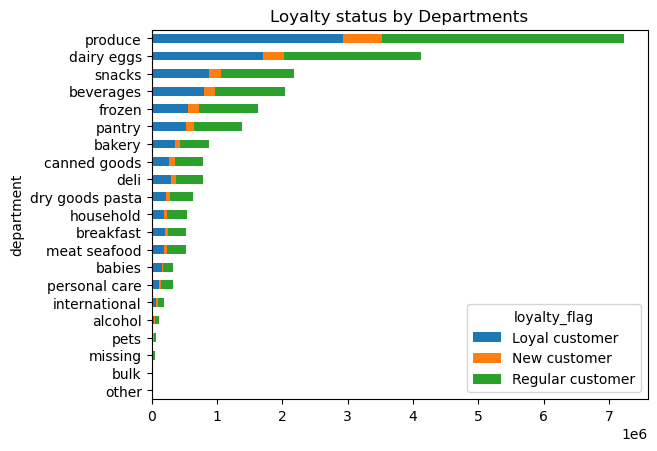

In [23]:
#stacked bar graph
stacked_loyalty_department = loyalty_department.plot.barh(stacked = True, title = 'Loyalty status by Departments')

In [24]:
# Exporting bar chart
stacked_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_by_loyalty.png'))